In [64]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [65]:
is_py=False

In [66]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [67]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\JupyterCode\MyQuantFinProject\Data'
result_path='D:\JupyterCode\MyQuantFinProject\Report'

# file_name='China_Nov20-Mar21.csv'
file_name='MyCrypto_W_Apr-June22.csv'
title=file_name.replace('.csv','')
print(file_name," : ",title)

#title=''

# since the end calculate since x 
to_month_str='2022-06'

# Whick time frame   and look past in the past x month
timeframe='M'
past_month=3

# timeframe='W'
# past_week=8

required_fullname=False

today=datetime.datetime.today()
print(today)




MyCrypto_W_Apr-June22.csv  :  MyCrypto_W_Apr-June22
2022-06-05 16:56:26.741350


#Enter data

if is_py:
    print("Enter Timeframe (m or w)")
    timeframe = input("Enter TimeFrame : ")
    timeframe=timeframe.upper()

    print("Enter To Date asY-m (2022-03)")
    end_param = input("Enter end : ")



    try:
        start_dt=datetime.strptime(start, "%Y.%m.%d")
        end_dt=datetime.strptime(end,"%Y.%m.%d")
        if start_dt>=end_dt:
           raise Exception(f"Error : {start_dt} can't be greater or equal to {end_dt}")
    except Exception as ex:
        raise ex



    print(f"Do you want to retrive data from {start_dt} to {end_dt} ?")
    press_y=input(f"Press y=True and n=False : ") 
    if press_y.lower()=='y':
     ok=True
    else:
     exit()
else: 
    start='2017.01.01'
    end= today_now.strftime("%Y.%m.%d")
    
print(f"{start} - {end}")

In [68]:
print(to_month_str)
split_end_to=to_month_str.split('-')
print(split_end_to)
if  len(split_end_to)==2:
 range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))
 print(range_month)
else:
 raise Exception("Need format  '2021-12' ")   
    



2022-06
['2022', '06']
(2, 30)


In [69]:
to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,1 )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-06-01 00:00:00
2022-06-30 00:00:00


In [70]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
     

print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

look back in the  3+1(Including current month)  M : 2022-03 - 2022-06


In [71]:
# create directory
folder_report=f'{title}_{timeframe }_{from_month_str}_{to_month_str}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\MyCrypto_W_Apr-June22_M_2022-03_2022-06


In [72]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
# dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time')
dfAll.index.rename('datetime',inplace=True)
print(dfAll.info())

print(dfAll.head())
print(dfAll.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2022-03-30 to 2022-06-05
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  408 non-null    object 
 1   open    408 non-null    float64
 2   high    408 non-null    float64
 3   low     408 non-null    float64
 4   close   408 non-null    float64
 5   name    0 non-null      float64
 6   volume  408 non-null    float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB
None
           Ticker   open    high    low  close  name      volume
datetime                                                        
2022-03-30   AVAX  92.73  100.48  89.50  95.58   NaN  3528529.75
2022-03-31   AVAX  95.57  101.98  93.68  97.41   NaN  4416637.00
2022-04-01   AVAX  97.43   99.80  90.26  96.83   NaN  3360841.00
2022-04-02   AVAX  96.81  103.62  95.73  96.25   NaN  3326092.50
2022-04-03   AVAX  96.25  100.09  94.41  98.05   NaN  2729825.00
           Ticker   open   high

In [73]:


df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)


if required_fullname==True: 
 df=df[['symbol','name','close']]   
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 
else:
 df=df[['symbol','close']]   
    

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2022-03-30 to 2022-06-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  408 non-null    object 
 1   close   408 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB
None
           symbol  close
datetime                
2022-03-30   AVAX  95.58
2022-03-31   AVAX  97.41
2022-04-01   AVAX  96.83
2022-04-02   AVAX  96.25
2022-04-03   AVAX  98.05
           symbol  close
datetime                
2022-06-01    SOL  40.11
2022-06-02    SOL  40.85
2022-06-03    SOL  38.28
2022-06-04    SOL  39.00
2022-06-05    SOL  38.68


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_6844\569249442.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [74]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  05-06-2022
['AVAX', 'BNB', 'BTC', 'ETH', 'MATIC', 'SOL']


In [75]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


  symbol month-year  pct_change
1   AVAX    04-2022       -41.5
2   AVAX    05-2022       -53.6
3   AVAX    06-2022        -8.1
  symbol month-year  pct_change
1    BNB    04-2022       -12.1
2    BNB    05-2022       -14.9
3    BNB    06-2022        -7.2
  symbol month-year  pct_change
1    BTC    04-2022       -17.3
2    BTC    05-2022       -15.5
3    BTC    06-2022        -6.3
  symbol month-year  pct_change
1    ETH    04-2022       -16.9
2    ETH    05-2022       -28.8
3    ETH    06-2022        -7.5
  symbol month-year  pct_change
1  MATIC    04-2022       -36.4
2  MATIC    05-2022       -35.9
3  MATIC    06-2022       -10.6
  symbol month-year  pct_change
1    SOL    04-2022       -31.1
2    SOL    05-2022       -45.9
3    SOL    06-2022       -15.5


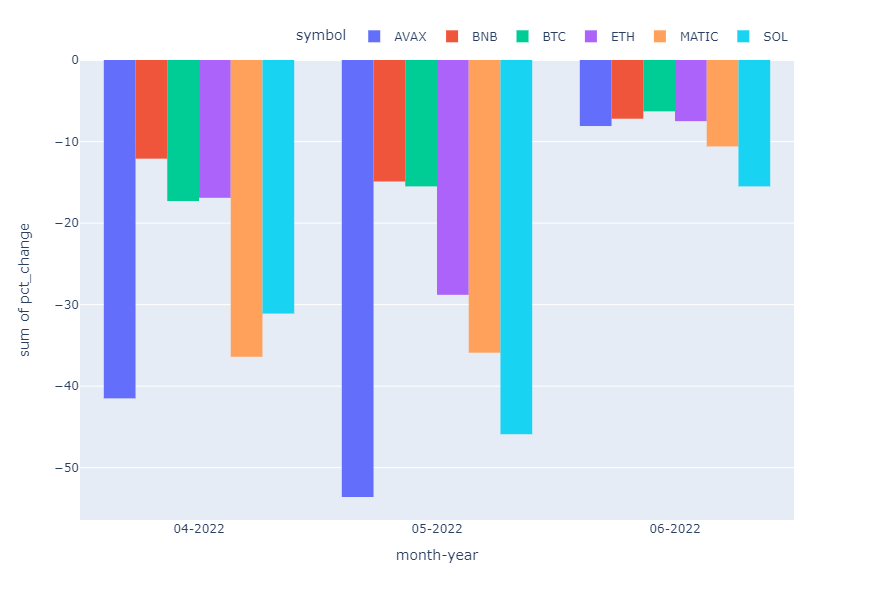

In [76]:
chart_title='pct_change'
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [77]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,AVAX,04-2022,-41.5,0
1,AVAX,05-2022,-53.6,0
2,AVAX,06-2022,-8.1,0
3,BNB,04-2022,-12.1,0
4,BNB,05-2022,-14.9,0


In [78]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
0,04-2022,0,6
1,05-2022,0,6
2,06-2022,0,6


In [79]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])



if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  
df_Monthly_Count

,month-year,is-gain,count
0,04-2022,0,6
1,05-2022,0,6
2,06-2022,0,6


In [80]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,04-2022,0,6
1,05-2022,0,6
2,06-2022,0,6


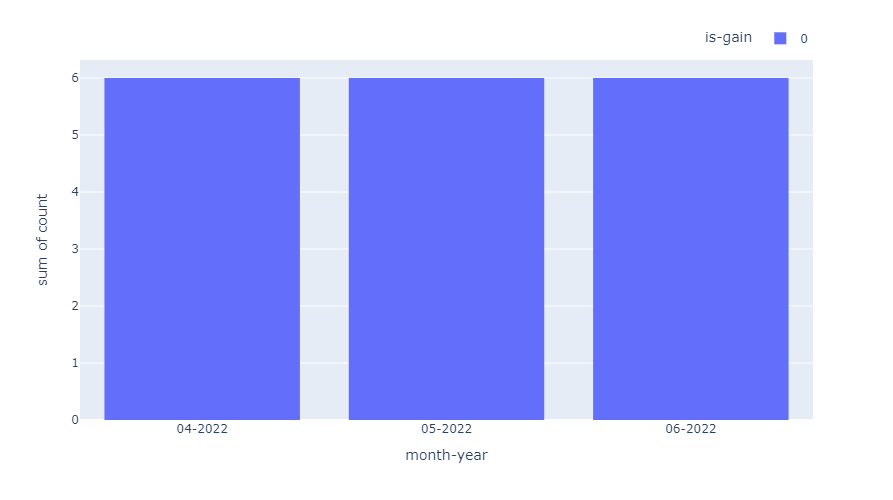

In [81]:
chart_title="gain-lose"

fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")